## reading the data

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\mohamed\Downloads\predictive_maintenance.csv")

In [2]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


## understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## feature selection1

In [5]:
data.drop(["Failure Type","UDI"],inplace=True,axis=1)

## check nulls

In [6]:
data.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

## check nulls

## check dublicated

In [7]:
data.duplicated().sum()

0

## outlayers

In [8]:
for i in data.columns:
    if(data[i].dtype in ["int64","float64"]):
        print(i)
        print(data[i].describe())

Air temperature [K]
count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64
Process temperature [K]
count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64
Rotational speed [rpm]
count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64
Torque [Nm]
count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64
Tool wear [min]
count    10000.000000
mean       1

In [9]:
import matplotlib.pyplot as plt

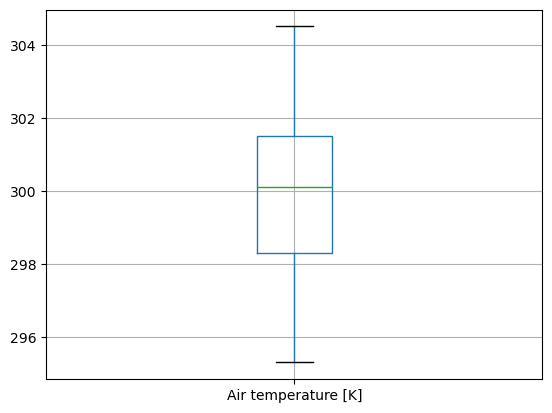

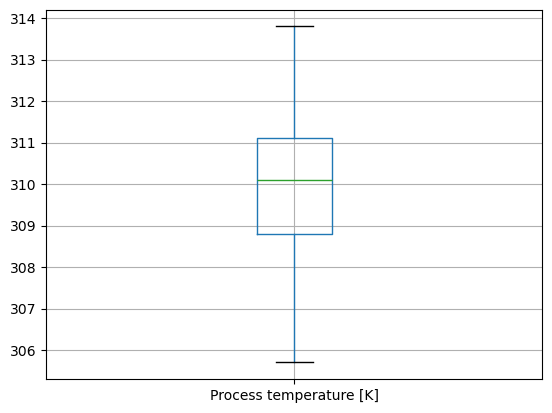

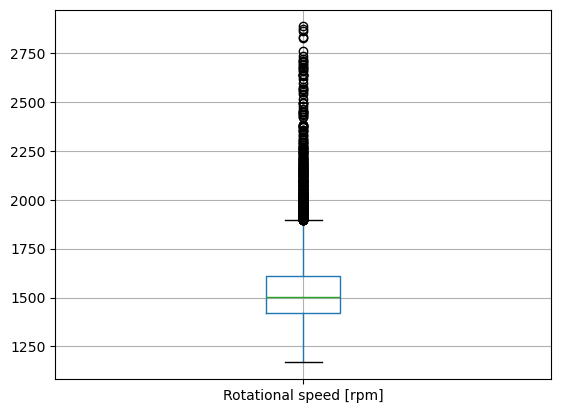

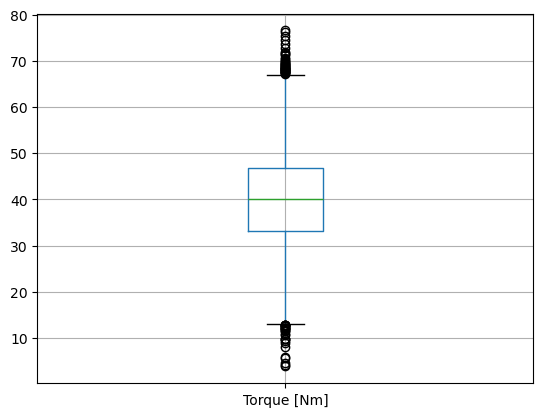

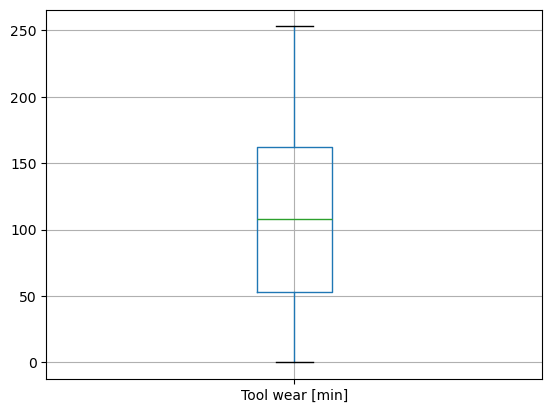

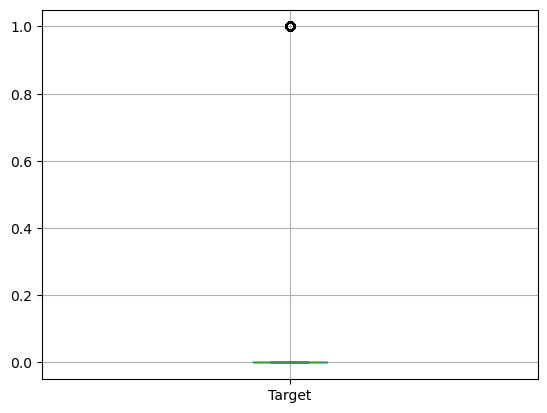

In [10]:
for i in data.columns:
    if(data[i].dtype in ["int64","float64"]):
        data.boxplot(i)
        plt.show()   

In [11]:
Q1=data["Rotational speed [rpm]"].quantile(0.25)
Q3=data["Rotational speed [rpm]"].quantile(0.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is{max}")
print(f"min is{min}")
outlayerrpm=data[(data["Rotational speed [rpm]"]>max) | (data["Rotational speed [rpm]"]<min)]
data=data[(data["Rotational speed [rpm]"]<=max) & (data["Rotational speed [rpm]"]>=min)]
print(f"shape of outlayerrpm :{outlayerrpm.shape}")
print(f"shape of data :{data.shape}")

max is1895.5
min is1139.5
shape of outlayerrpm :(418, 8)
shape of data :(9582, 8)


In [12]:
Q1=data["Torque [Nm]"].quantile(0.25)
Q3=data["Torque [Nm]"].quantile(0.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is{max}")
print(f"min is{min}")
outlayerNm = data[(data["Torque [Nm]"] > max) | (data["Torque [Nm]"] < min)]

data=data[(data["Torque [Nm]"]<=max) & (data["Torque [Nm]"]>=min)]
print(f"shape of outlayerNm :{outlayerNm.shape}")
print(f"shape of data :{data.shape}")

max is66.45
min is14.850000000000005
shape of outlayerNm :(47, 8)
shape of data :(9535, 8)


In [13]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M14860,M,298.1,308.6,1551,42.8,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0
2,L47182,L,298.1,308.5,1498,49.4,5,0
3,L47183,L,298.2,308.6,1433,39.5,7,0
4,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0
9996,H39410,H,298.9,308.4,1632,31.8,17,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0
9998,H39412,H,299.0,308.7,1408,48.5,25,0


## check number of unique value

In [14]:
for i in data.columns:
    if(data[i].dtype=="object"):
        print(i)
        print(len(data[i].unique()))

Product ID
9535
Type
3


## feature selection 2

In [15]:
data.drop("Product ID",inplace=True,axis=1)

In [16]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


## check balance in category in TYPE

In [17]:
data["Type"].value_counts()

Type
L    5713
M    2859
H     963
Name: count, dtype: int64

In [18]:
##not balanced

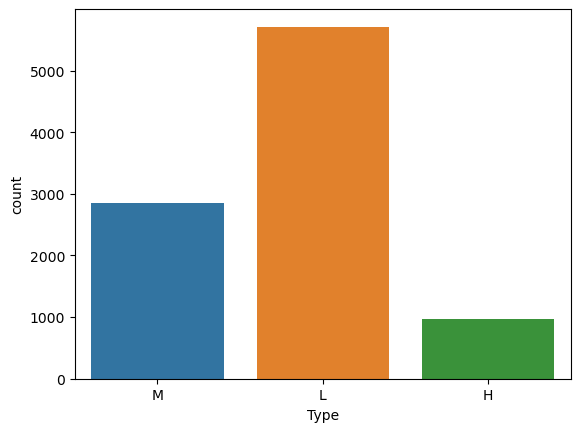

In [19]:
import seaborn as sns
sns.countplot(x="Type",data=data)
plt.show()

## use RandomOverSampler to balance TYPE

In [20]:
from imblearn.over_sampling import RandomOverSampler
X = data.drop("Type", axis=1)
y = data["Type"]
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
print(balanced_data["Type"].value_counts())

Type
M    5713
L    5713
H    5713
Name: count, dtype: int64


In [21]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type
0,298.1,308.6,1551,42.8,0,0,M
1,298.2,308.7,1408,46.3,3,0,L
2,298.1,308.5,1498,49.4,5,0,L
3,298.2,308.6,1433,39.5,7,0,L
4,298.2,308.7,1408,40.0,9,0,L
...,...,...,...,...,...,...,...
17134,298.7,309.2,1437,45.7,195,0,M
17135,301.0,312.2,1629,32.6,69,0,M
17136,303.0,311.1,1428,39.8,181,0,M
17137,300.7,310.6,1474,37.0,33,0,M


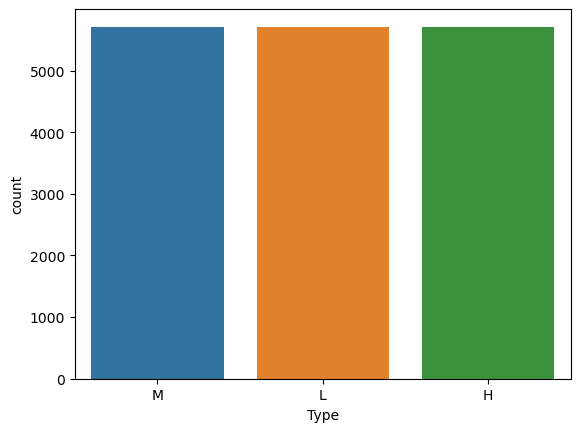

In [22]:
sns.countplot(x="Type",data=balanced_data)
plt.show()

## encoding by ordinal encoder

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
balanced_data['Type_encoded'] = encoder.fit_transform(balanced_data[['Type']])
print(balanced_data[['Type', 'Type_encoded']])

      Type  Type_encoded
0        M           1.0
1        L           0.0
2        L           0.0
3        L           0.0
4        L           0.0
...    ...           ...
17134    M           1.0
17135    M           1.0
17136    M           1.0
17137    M           1.0
17138    M           1.0

[17139 rows x 2 columns]


In [25]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type,Type_encoded
0,298.1,308.6,1551,42.8,0,0,M,1.0
1,298.2,308.7,1408,46.3,3,0,L,0.0
2,298.1,308.5,1498,49.4,5,0,L,0.0
3,298.2,308.6,1433,39.5,7,0,L,0.0
4,298.2,308.7,1408,40.0,9,0,L,0.0
...,...,...,...,...,...,...,...,...
17134,298.7,309.2,1437,45.7,195,0,M,1.0
17135,301.0,312.2,1629,32.6,69,0,M,1.0
17136,303.0,311.1,1428,39.8,181,0,M,1.0
17137,300.7,310.6,1474,37.0,33,0,M,1.0


In [26]:
balanced_data.drop("Type",inplace=True,axis=1)

In [27]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...
17134,298.7,309.2,1437,45.7,195,0,1.0
17135,301.0,312.2,1629,32.6,69,0,1.0
17136,303.0,311.1,1428,39.8,181,0,1.0
17137,300.7,310.6,1474,37.0,33,0,1.0


In [28]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17139 entries, 0 to 17138
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      17139 non-null  float64
 1   Process temperature [K]  17139 non-null  float64
 2   Rotational speed [rpm]   17139 non-null  int64  
 3   Torque [Nm]              17139 non-null  float64
 4   Tool wear [min]          17139 non-null  int64  
 5   Target                   17139 non-null  int64  
 6   Type_encoded             17139 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 937.4 KB


## check correlation

In [29]:
balanced_data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
Air temperature [K],1.000000,0.878608,0.021399,-0.014407,0.017701,0.087383,-0.034312
Process temperature [K],0.878608,1.000000,0.018623,-0.013631,0.019940,0.035509,-0.025501
Rotational speed [rpm],0.021399,0.018623,1.000000,-0.893132,0.013669,-0.149158,0.001681
Torque [Nm],-0.014407,-0.013631,-0.893132,1.000000,-0.012138,0.193797,-0.008251
Tool wear [min],0.017701,0.019940,0.013669,-0.012138,1.000000,0.104294,-0.017048
Target,0.087383,0.035509,-0.149158,0.193797,0.104294,1.000000,-0.047741
Type_encoded,-0.034312,-0.025501,0.001681,-0.008251,-0.017048,-0.047741,1.000000


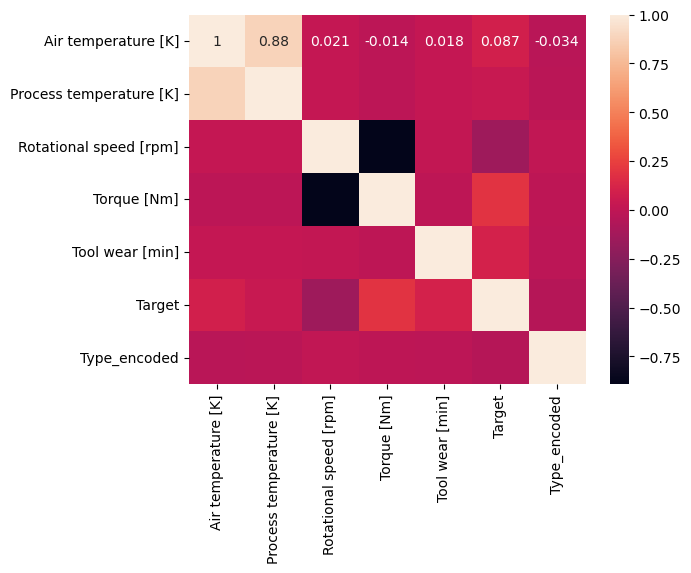

In [30]:
import seaborn as sns 
sns.heatmap(balanced_data.corr(), annot=True)
plt.show()

## split X,y

In [31]:
X=balanced_data.drop(["Target"],inplace=False,axis=1)
y=balanced_data["Target"]

## check balance in target

In [32]:
balanced_data["Target"].value_counts()

Target
0    16746
1      393
Name: count, dtype: int64

In [33]:
## notbalanced

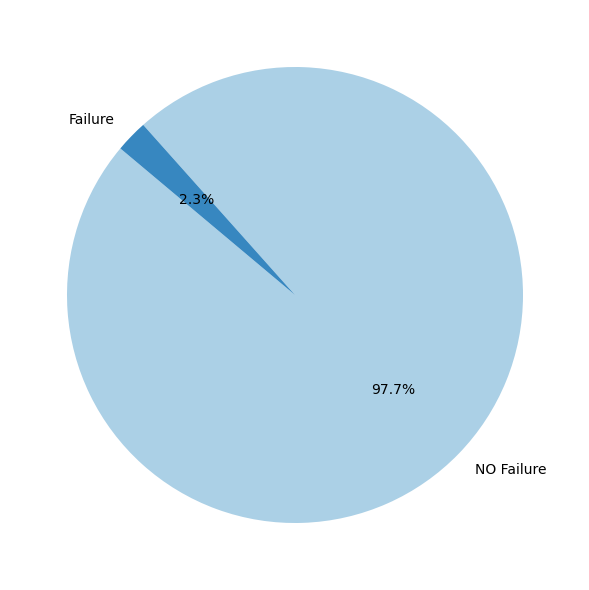

In [34]:
counts = balanced_data['Target'].value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(10, 6))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["NO Failure", "Failure"])
plt.tight_layout()
plt.show()

## use smote to balabce target

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X, y)

In [37]:
y.value_counts() 

Target
0    16746
1    16746
Name: count, dtype: int64

## feature selection 3 by SelectPercentile

In [38]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 

In [39]:
FeatureSelection = SelectPercentile(score_func = chi2, percentile=80)
X = FeatureSelection.fit_transform(X, y)

In [40]:
pd.DataFrame(X)

,0,1,2,3
0,1551.0,42.800000,0.0,1.00000
1,1408.0,46.300000,3.0,0.00000
2,1498.0,49.400000,5.0,0.00000
3,1433.0,39.500000,7.0,0.00000
4,1408.0,40.000000,9.0,0.00000
...,...,...,...,...
33487,1604.0,36.100000,225.0,2.00000
33488,1549.0,35.800000,206.0,2.00000
33489,1294.0,62.400000,101.0,2.00000
33490,1364.0,47.833544,213.0,0.98802


In [41]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...
17134,298.7,309.2,1437,45.7,195,0,1.0
17135,301.0,312.2,1629,32.6,69,0,1.0
17136,303.0,311.1,1428,39.8,181,0,1.0
17137,300.7,310.6,1474,37.0,33,0,1.0


## split the data train and test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (26793, 4)
X_test shape is  (6699, 4)
y_train shape is  (26793,)
y_test shape is  (6699,)


## train model by use gridsearchcv

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RandomForestClassifierModel = RandomForestClassifier(random_state=33)
param_grid = {
    'n_estimators': [50, 100, 200],   
    'max_depth': [None, 5, 10, 20],   
    'criterion': ['gini', 'entropy'],   
}
grid_search = GridSearchCV(estimator=RandomForestClassifierModel, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


RandomForestClassifier(n_estimators=200, random_state=33)

## evaluation

In [46]:
from sklearn.metrics import classification_report

In [47]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       1.00      0.98      0.99      3314
           1       0.98      1.00      0.99      3385

    accuracy                           0.99      6699
   macro avg       0.99      0.99      0.99      6699
weighted avg       0.99      0.99      0.99      6699



## train model by use gridsearchcv 

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [3, 4, 5], 
}
GBCModel = GradientBoostingClassifier(random_state=33)
grid_search = GridSearchCV(estimator=GBCModel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'max_depth': 5, 'n_estimators': 150}


GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=33)

## evaluation

In [50]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       0.99      0.95      0.97      3314
           1       0.96      0.99      0.97      3385

    accuracy                           0.97      6699
   macro avg       0.97      0.97      0.97      6699
weighted avg       0.97      0.97      0.97      6699



## train model by use gridsearchcv

In [51]:

from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20]
}
dtcModel = DecisionTreeClassifier(random_state=33)
grid_search = GridSearchCV(estimator=dtcModel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', random_state=33)

## evaluation

In [52]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       0.99      0.98      0.98      3314
           1       0.98      0.99      0.98      3385

    accuracy                           0.98      6699
   macro avg       0.98      0.98      0.98      6699
weighted avg       0.98      0.98      0.98      6699

